In [183]:
# inspired by 
# https://medium.com/@tommaso.romani2000/harnessing-the-power-of-k-means-for-anomaly-detection-24dc71d260a8
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

In [184]:
# random sample numbers
n_samples = 1000
n_features = 2
n_clusters = 3
n_anomalies = 50
# generate normal datapoints 
x, _ = make_blobs(n_samples=n_samples - n_anomalies, n_features=n_features, centers=n_clusters)
# generate anomalies 
anomaly_center = np.array([10, 10])
anomalies = anomaly_center + np.random.rand(n_anomalies, n_features) * 2.0
x = np.vstack((x, anomalies))

In [185]:
# fit kmeans 
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
# labels points in the dataset 
labels = kmeans.predict(x)

In [186]:
# centers of clusters
centers = kmeans.cluster_centers_
# distance between each point and the center in its cluster 
distances = [np.linalg.norm(p - centers[cluster]) for p, cluster in zip(x, labels)]

In [187]:
# calculate distance threshold 
# any point with a distance_from_center above the threshhold is labelled an anomaly 
threshold = 95
threshold_distance = np.percentile(distances, threshold)

In [188]:
anomalies = [x[i] for i, distance in enumerate(distances) if distance > threshold_distance]
anomalies = np.asarray(anomalies, dtype=np.float32)

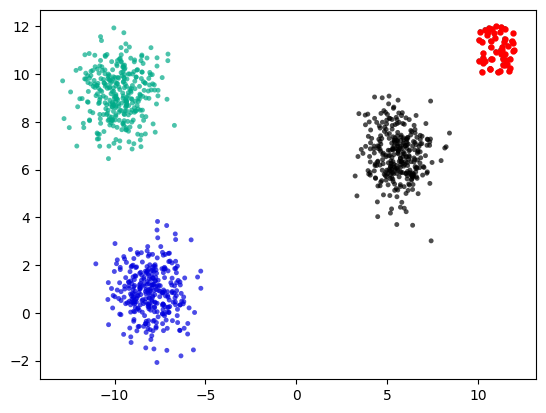

In [189]:
# visualize 
colors = cm.nipy_spectral(labels.astype(float) / 5)
plt.scatter(x[:,0], x[:,1], marker='.', s=50, lw=0, alpha=0.7, c=colors, edgecolor='k')
plt.scatter(anomalies[:,0], anomalies[:, 1], color='red', marker='.', s=50, label='Anomalies')
plt.show()